In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ipywidgets import interact, interactive, fixed, RadioButtons
import ipywidgets as widgets
from IPython.display import display

# การทำ medien filter โดยผ่าน ไลบรารี่ skimage

scipy.ndimage.median_filter(input, size=None, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)

size คือ ขนาด kernal



In [ ]:
import scipy.misc
import scipy.ndimage
from PIL import Image
from skimage import io, data
from matplotlib import pyplot as plt
%matplotlib inline
@interact(kernel=(3, 47, 2))
def f(kernel=3):
  a = Image.open('/content/drive/MyDrive/images/lena_noisy.png')
  b = scipy.ndimage.filters.median_filter(a,size=kernel)
  b = Image.fromarray(b)
  #b = scipy.misc.toimage(b) กรณีที่ SciPy 1.0.0 version
  #b.save('/content/drive/My Drive/images/lena_median.png')

  #show image
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel()
  ax[0].imshow(a)
  ax[0].set_title("original")
  ax[1].imshow(b)
  ax[1].set_title("median_filter $\kernal$ = {}".format(kernel))
  #plt.imshow(b)
  plt.show()

interactive(children=(IntSlider(value=3, description='kernel', max=47, min=3, step=2), Output()), _dom_classes…

หากเรามีชุดของภาพคุณภาพต่่ำหลาย ๆ ภาพซึ่งถ่ายจากมุมกล้องเดียวกัน เราสามารถสร้าง
ภาพใหม่ที่มีคุณภาพสูงกว่าจากชุดภาพนั้นได้ หากสัญญาณรบกวนเกิดขึ้นแบบสุ่ม ภาพที่เก็บแต่ละ ครั้งย่อมมีลักษณะแตกต่างกัน หากความเข้มแสงของจุดในภาพหนึ่งถูกรบกวน เราสามารถนำข้อมูล
ความเข้มแสงของจุด จากภาพอื่น ณ ตำแหน่งเดียวกันมาแทน แต่ละจุดในภาพผลลัพธ์ที่ได้จะเกิด จากการเฉลี่ย (หรือเลือก) จากจุดที่ตรงกันของภาพต่าง ๆ ในชุดภาพ

การกรองข้อมูลภาพโดยใช้ค่าเฉลี่ยแบบคณิตศาสตร์ (mean filtering)

 เป็นฟิลเตอร์ที่นิยมน ามาประยุกต์ใช้ในการลดสัญญาณในรูปภาพ  เนื่องจากมีกระบวนกร ทำงานที่ง่ายโดยผลลัพธ์ที่ได้จากฟิลเตอร์นี้จะทำให้รูปภาพมีค่าความเข้มที่ราบเรียบ  ในการ ประมวลผลภาพจะประกอบด้วย  2  ส่วนคือ 1. รูปภาพโหมดสีเทาที่ต้องการลดสัญญาณรบกวน  และ 2. ส่วนที่ทำให้ภาพราบเรียบขึ้น เรียกว่า เคอร์แนล

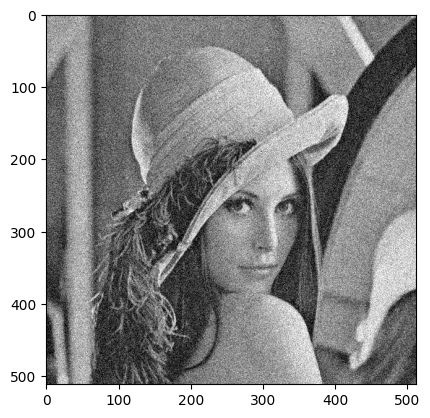

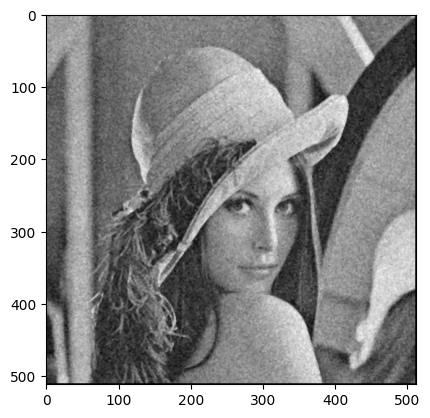

In [ ]:
# Median Spatial Domain Filtering

'''
Median Filtering: It is also known as nonlinear filtering.
It is used to eliminate salt and pepper noise.
Here the pixel value is replaced by the median
value of the neighboring pixel.

'''

import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

# Read the image
img_noisy1 = cv2.imread('/content/drive/MyDrive/images/lena_noisy.png',0)


# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the ceter pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]

		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)



# Display the images
plt.imshow(img_noisy1, cmap="gray", vmin=0, vmax=255)
plt.show()

# Display the images
plt.imshow(img_new1, cmap="gray", vmin=0, vmax=255)
plt.show()

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


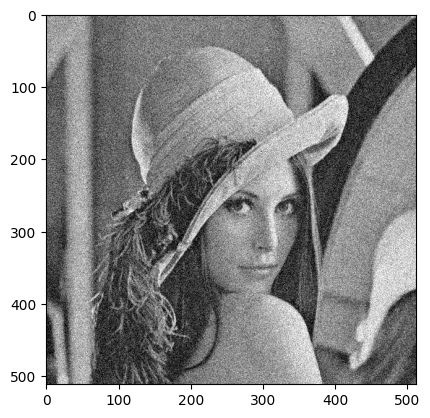

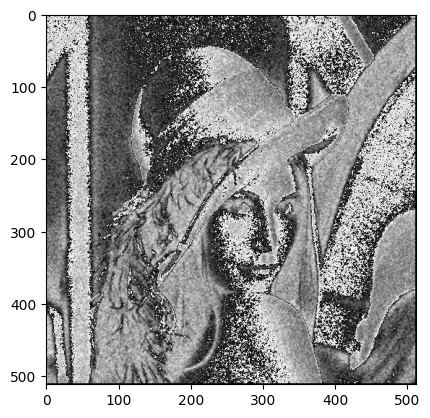

In [ ]:
# High Pass SPatial Domain Filtering


'''
High Pass Filtering: It eliminates low-frequency regions
while retaining or enhancing the high-frequency components.
A high pass filtering mask is as shown.

-1/9 -1/9 -1/9
-1/9 8/9 -1/9
-1/9 -1/9 -1/9

'''

import cv2
import matplotlib.pyplot as plt
import math
import numpy as np


# Read the image
img = cv2.imread('/content/drive/MyDrive/images/lena_noisy.png', 0)

# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
#mask = np.ones([3, 3], dtype = int)
#print(mask)
#mask = mask / -9
#print(mask)

#print(mask)

mask = np.array([[-1/9, -1/9, -1/9], [-1/9, -8/9, -1/9],[-1/9, -1/9, -1/9]],dtype = float)
print(mask)
# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]

		img_new[i, j]= temp

img_new = img_new.astype(np.uint8)


# Display the images
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

# Display the images
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)
plt.show()

ไลบรารี จาก skimage

In [ ]:
import skimage
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.filters import gaussian, gabor_kernel, sobel, sobel_h, sobel_v, prewitt, prewitt_h, prewitt_v, roberts, median
from skimage.io import imread, imsave
from skimage.restoration import denoise_bilateral, denoise_nl_means
from skimage.transform import rotate, resize
from skimage.morphology import square

ไลบรารี อื่นๆ

In [ ]:
from scipy import ndimage
from scipy import signal
from scipy.misc import derivative

import matplotlib.pyplot as plt
%matplotlib inline
plt.gray();
from matplotlib.pyplot import imshow
import matplotlib.mlab as mlab
import matplotlib.colors as colors

import numpy as np
from numpy.fft import fft

import wave

<Figure size 640x480 with 0 Axes>

In [ ]:
from time import time


import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, RadioButtons

from tqdm.notebook import tqdm

การทำ average filter
ฟิลเตอร์แบบค่าเฉลี่ย เป็น ฟิลเตอร์ความถี่ต่ำผ่าน สามารถใช้กำจัดสัญญาณรบกวนแบบเกาส์เซียนได้ แต่มีผลข้างเคียง คือ ภาพเอาท์พุตที่ได้จะมีลักษณะเบลอ

ภาพจะเบลอขึ้น

In [ ]:
im = rgb2gray(imread('/content/drive/MyDrive/images/lena_noisy.png'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

im[25, 70] = 0

vals = (val_start, val_end, val_step) = 1, 21, 2
val_default = 3

@interact(N=vals)
def g(N=val_default):

    fig = plt.figure(figsize=(10, 3))

    ax = fig.add_subplot(1, 2, 1)
    imshow(im)
#     plt.axis('off')
    plt.title('original image {0}x{1}'.format(im.shape[0], im.shape[1]))

    ax = fig.add_subplot(1, 2, 2)
    w = np.ones((N, N)) / (N ** 2)  # window nxn
    imshow(ndimage.convolve(im, w))
    plt.axis('off')
    plt.title('{0}x{0} average filter'.format(N))


    plt.show()

interactive(children=(IntSlider(value=3, description='N', max=21, min=1, step=2), Output()), _dom_classes=('wi…

In [ ]:
im = imread('/content/drive/MyDrive/images/salt_and_pepper.png')

@interact(sigma=(0, 10, 1), N=(1, 10, 1))
def g(sigma=2, N=3):

    fig = plt.figure(figsize=(15, 5))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im)
    plt.axis('off')
    plt.title('original image')


    ax = fig.add_subplot(1, 3, 2)
    imshow(gaussian(im, sigma=sigma))
    plt.axis('off')
    plt.title('Gaussian filter with $\sigma$={}'.format(sigma))

    ax = fig.add_subplot(1, 3, 3)
    imshow(median(im, square(N)))
    plt.axis('off')
    plt.title('Median filter with {0}x{0} patch'.format(N))



    plt.show()

interactive(children=(IntSlider(value=2, description='sigma', max=10), IntSlider(value=3, description='N', max…

In [ ]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.restoration import denoise_bilateral
from skimage.filters import gaussian
from ipywidgets import interact

im = imread('/content/drive/My Drive/images/salt_and_pepper.png')

# ตรวจสอบภาพเป็นขาวดำหรือสี
if len(im.shape) == 3:
    im = rgb2gray(im)

@interact(sigma_spatial=(0, 15, 1), sigma_color=(0, 0.5, 0.1))
def g(sigma_spatial=1, sigma_color=0.1):
    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(im)
    plt.axis('off')
    plt.title('Original Image')

    ax = fig.add_subplot(1, 3, 2)
    imshow(gaussian(im, sigma=sigma_spatial))
    plt.axis('off')
    plt.title(f'Gaussian Filter with sigma={sigma_spatial}')

    ax = fig.add_subplot(1, 3, 3)
    im_denoise = denoise_bilateral(im, sigma_spatial=sigma_spatial, sigma_color=sigma_color)
    imshow(im_denoise)
    plt.axis('off')
    plt.title(f'sigma_spatial={sigma_spatial}, sigma_color={sigma_color}')

    plt.show()



interactive(children=(IntSlider(value=1, description='sigma_spatial', max=15), FloatSlider(value=0.1, descript…

# การหาอนุพันธ์อันดับที่ 1 ของภาพ

interactive(children=(Dropdown(description='kernel', options=('diff', 'prewitt', 'sobel'), value='diff'), Floa…

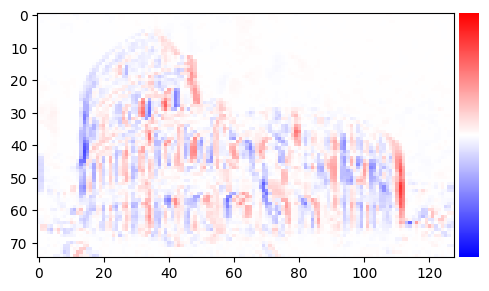

In [ ]:
im = rgb2gray(imread('/content/drive/MyDrive/images/Colosseum.jpg'))
im = resize(im, (im.shape[0]//5, im.shape[1]//5))

kernels = {'diff': np.array([[ 0,0,0],
                             [-1,0,1],
                             [ 0,0,0]]) / 2,
           'prewitt': np.array([[-1,0,1],
                                [-1,0,1],
                                [-1,0,1]]) / 6,
           'sobel': np.array([[-1,0,1],
                              [-2,0,2],
                              [-1,0,1]]) / 8
          }

@interact(kernel=['diff', 'prewitt', 'sobel'],
          val_max=(0.1, 0.5, 0.1))
def g(kernel='diff', val_max=0.1):

    k = kernels[kernel]

    imh = ndimage.convolve(im, k)
    imv = ndimage.convolve(im, k.T)

    fig = plt.figure(figsize=(15, 3))

    ax = fig.add_subplot(1, 3, 1)
    imshow(imh, cmap="bwr", vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.title('$I_x$')

    ax = fig.add_subplot(1, 3, 2)
    imshow(imv, cmap="bwr", vmin=-0.5, vmax=0.5)
    plt.axis('off')
    plt.colorbar()
    plt.title('$I_y$')

    ax = fig.add_subplot(1, 3, 3)
    imshow(np.sqrt(imv**2 + imh**2), cmap="gray", vmin=0, vmax=val_max)
    plt.axis('off')
    plt.colorbar()
    plt.title('$\sqrt{I_x^2 + I_y^2}$')

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from skimage.filters import sobel, prewitt, roberts
from ipywidgets import interact

@interact(val_max=(0.1, 0.5, 0.1))
def g(val_max=0.1):
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))

    # Sobel Filter
    ax1 = axes[0]
    img1 = ax1.imshow(sobel(im), vmin=0, vmax=val_max, cmap='gray')
    ax1.axis('off')
    fig.colorbar(img1, ax=ax1)
    ax1.set_title('Sobel')

    # Prewitt Filter
    ax2 = axes[1]
    img2 = ax2.imshow(prewitt(im), vmin=0, vmax=val_max, cmap='gray')
    ax2.axis('off')
    fig.colorbar(img2, ax=ax2)
    ax2.set_title('Prewitt')

    # Roberts Filter
    ax3 = axes[2]
    img3 = ax3.imshow(roberts(im), vmin=0, vmax=val_max, cmap='gray')
    ax3.axis('off')
    fig.colorbar(img3, ax=ax3)
    ax3.set_title('Roberts')

    plt.show()


interactive(children=(FloatSlider(value=0.1, description='val_max', max=0.5, min=0.1), Output()), _dom_classes…

# การหาภาพขอบด้วยวิธีอนุพันธ์อันดับที่ 2 (Laplacian)

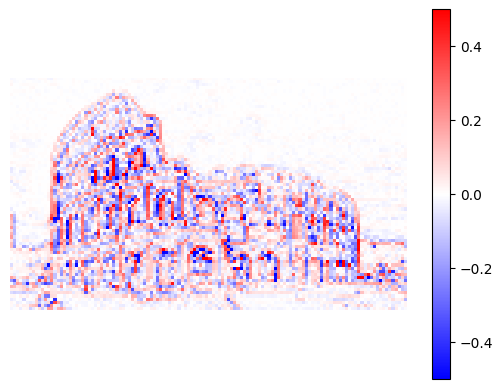

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

L4 = np.array([[0, 1, 0],
               [1, -4, 1],
               [0, 1, 0]])

# ใช้ plt.imshow() แทน skimage.io.imshow
plt.imshow(ndimage.convolve(im, L4), cmap="bwr", vmin=-0.5, vmax=0.5)
plt.axis('off')  # ซ่อนแกน
plt.colorbar()   # เพิ่มแถบสี
plt.show()


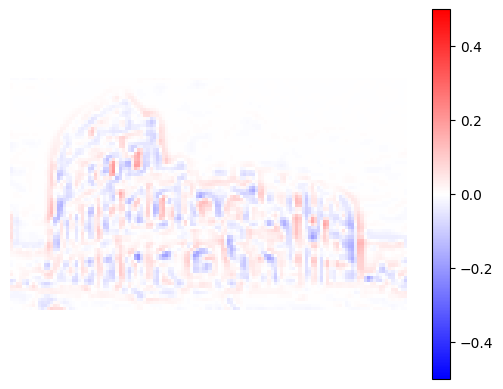

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.filters import gaussian

L4 = np.array([[0, 1, 0],
               [1, -4, 1],
               [0, 1, 0]])

# การคอนโวลูชันหลังจาก Gaussian smoothing
plt.imshow(ndimage.convolve(gaussian(im, sigma=1), L4), cmap="bwr", vmin=-0.5, vmax=0.5)
plt.axis('off')  # ซ่อนแกน
plt.colorbar()   # แสดงแถบสี
plt.show()
